In [1]:
import numpy as np
import numpy.typing as npt
from typing import Any
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pathlib import Path

sys.path.append(str(Path("..")))

In [2]:
from lib.base_manage_data import load_result, delete_result, delete_all
from lib.base_function import (
    exact_free_energy, exact_order_parameter,
    exact_internal_energy, exact_heat_capacity
)

In [3]:
state = 8
if state == 0: Kc = 1.12
else: Kc = (state-1)*np.log(1+np.sqrt(state))/state

print(f"{Kc = }")

step, Dcut = 20, 40
df = load_result(state=state, step=step, Dcut=Dcut)
df.columns.values

Kc = 1.1746472906468353


array(['key', 'state', 'beta', 'magnetic_field', 'step', 'Dcut',
       'initial', 'reshape', 'decompose', 'truncate', 'total', 'process',
       'free_energy', 'order_parameter', 'hamiltonian', 'heat_capacity'],
      dtype=object)

In [4]:
# delete_all()

In [5]:
# # delete = df[(df["magnetic_field"] == 0.0)]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))

['aeb1cf', '02f01c', 'b4f6cb', '516d17', '97144a', '038edf', 'ec2ac9', 'e4ca00', '607933', '29b13b', '0756e3', '197608', '59edaa', '0c9003', '2df5e2', '2868ee', 'dbb7e0', 'b8562e', 'd635b3', '014e8c', 'eb0808', '109ed8', 'd51a03', '1cda14', 'f27810', '9b9a26', 'adb9a0', '266893', 'b16815', 'ae93d4', '41808f', '5605e6', 'da3e82', 'd898fb', 'e16fbb', 'd0fb91', '022be4', '5d7075', 'b71b7a', 'e2b12a', '8a6879', 'a458ba', 'c542e5', '89aefd', '52885f', 'b09a56', '3e9463', '8ab7a2', 'ccafbf', '34b6fd', '0c2b97', 'e002a1', 'ff7c2e', '75ec6b', '2e54c0', '5f374f', 'e93a18', '21002a', '6d1026', '6f03f6', '6987e7', '03fb83', '522b17', '810254', '51942f', '22ebbc', 'af7090', '4659ec', '1c387f', 'b1a174', 'e104c0', '7a4af7', '482fdb', '97e285', '437fed', '706f3a', '2f3928', '99c3b1', 'ae77be', '07b874', '280bba', 'f9df21', '84b5c6', 'a71348', '998af6', 'e79222', 'e53274', '039c6a', '45bad5', '87ccc8', '968eba', '175d05', '108625', '193ad8', 'd4ff1f', 'e06919', '255e09', '873b42', 'ff25bc', '35944f',

In [6]:
# delete_result(list(delete["key"]))

In [7]:
df = df.sort_values("beta", ascending=True)

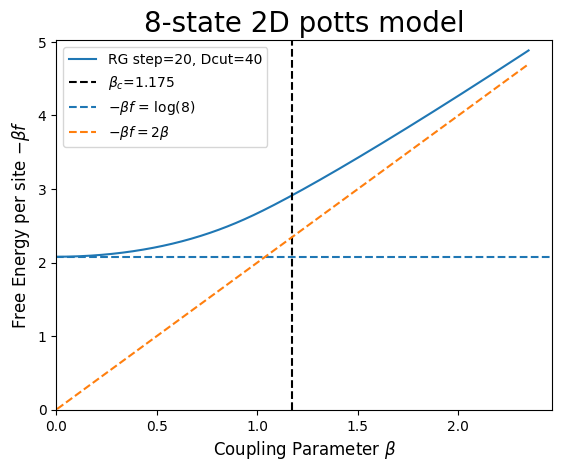

In [8]:
fig, ax = plt.subplots()

def free_energy(target_step): # * free energy = log(분배함수 Z) / N
    free_energy = []
    for free in df["free_energy"]:
        free_energy.append(free[target_step-1])
    return np.array(free_energy)

def get_beta(df):
    beta = []
    for params in df["beta"]:
        beta.append(params)
    return np.array(beta)

beta = get_beta(df)
target_step = 20

ax.plot(beta, free_energy(target_step), 
        label=f"RG step={target_step}, Dcut={Dcut}")
# ax.plot(beta, exact_free_energy(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
ax.set_xlim([0, None])
ax.set_ylim([0, None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Free Energy per site $-\beta f$", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")
if state != 0: ax.axhline(np.log(state), linestyle="--", label=rf"$- \beta f$ = log({state})")
ax.plot(beta, 2*beta, linestyle="--", label=rf"$- \beta f=2\beta$")

plt.legend()
# plt.savefig(f"./fig/{state}-state Free energy.jpg")
plt.show()

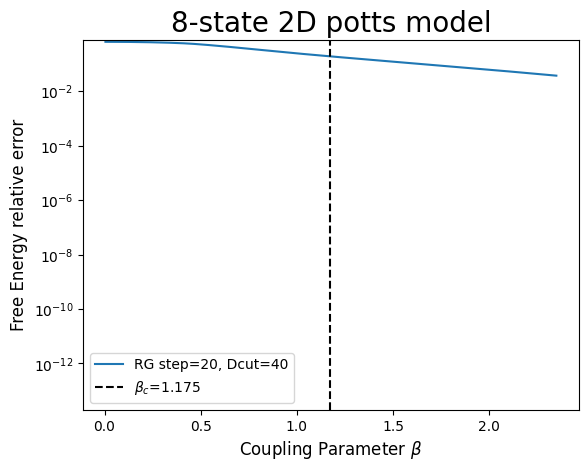

In [9]:
fig, ax = plt.subplots()

ax.plot(beta, np.abs((free_energy(
        target_step)-exact_free_energy(beta))/free_energy(target_step)),
        label=f"RG step={target_step}, Dcut={Dcut}")
ax.set_yscale("log")
# ax.set_xlim([0, coupling_max])
ax.set_ylim([2e-14, None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel("Free Energy relative error", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")

plt.legend()
# plt.savefig("./fig/{state}-state Free energy relative error.jpg")
plt.show()

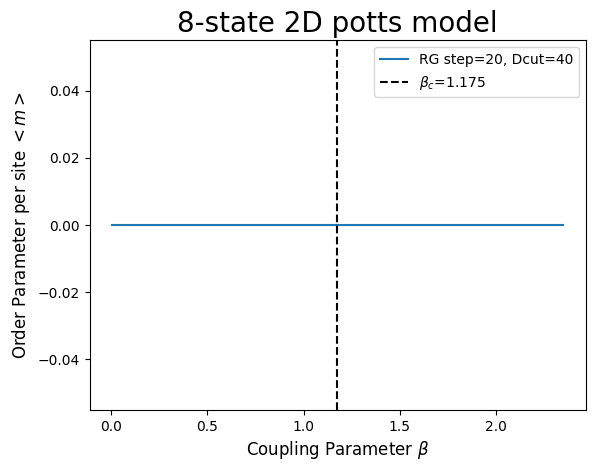

In [10]:
fig, ax = plt.subplots()

def order_parameter(target_step):
    order_parameter = []
    for value in df["order_parameter"]:
        order_parameter.append(value[target_step-1])
    
    return order_parameter

target_step = 20

ax.plot(beta, order_parameter(target_step),
        label=f"RG step={target_step}, Dcut={Dcut}")
# ax.plot(beta, exact_order_parameter(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
# ax.set_xlim([0, coupling_max])
# ax.set_ylim([0,None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Order Parameter per site $<m>$", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")
# ax.axhline(np.log(state), linestyle="--", label=rf"$- \beta f$ = log({state})")
# ax.plot(beta, 2*beta, linestyle="--", label=rf"$- \beta f=2\beta$")

plt.legend()
# plt.savefig(f"./fig/{state}-state Order parameter.jpg")
plt.show()

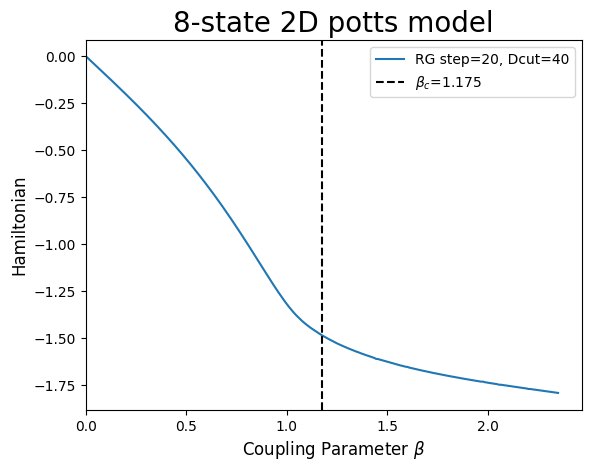

In [11]:
fig, ax = plt.subplots()

target_step = 20

hamiltonian = -np.gradient(free_energy(target_step), beta, edge_order=2)

ax.plot(beta, hamiltonian, 
        label=f"RG step={target_step}, Dcut={Dcut}")
# ax.plot(beta, exact_internal_energy(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
ax.set_xlim([0, None])
# ax.set_ylim([-2,None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Hamiltonian", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")

plt.legend()
# plt.savefig(f"./fig/{state}-state Free energy.jpg")
plt.show()

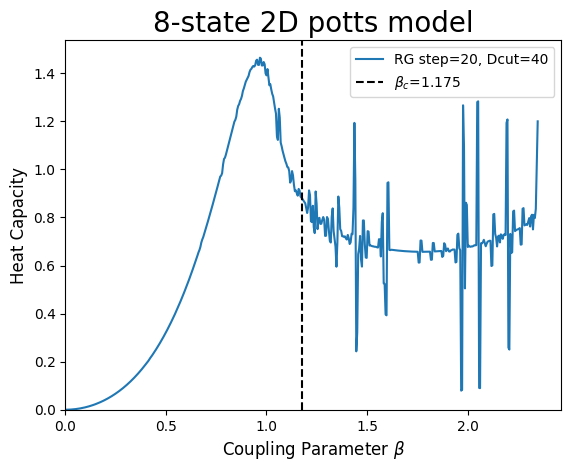

In [12]:
fig, ax = plt.subplots()

heat_capacity = -np.gradient(hamiltonian, beta, edge_order=2) * beta**2

ax.plot(beta, heat_capacity,
        label=f"RG step={target_step}, Dcut={Dcut}")
# ax.plot(beta, exact_heat_capacity(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
ax.set_xlim([0, None])
ax.set_ylim([0, None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Heat Capacity", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")

plt.legend()
# plt.savefig(f"./fig/{state}-state Free energy.jpg")
plt.show()